# MACHINE LEARNING - CREDIT SCREENING

# downloading all required libraries and modules for this script

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Reading and importing the data

The data was generated with chatgpt - no column name as such were generated as it is of common use to privacy with sensitive data, even in simulation.


In [152]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/govinda-lienart/credit_screening/refs/heads/main/synthetic_dataset_with_missing_values.csv'

df = pd.read_csv(path)
display (df)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,Class
0,a,56,5.326172664550231,y,g,no_cc,t,1.9965795790465406,t,835,f,f,135464,1
1,a,69,2.4247050363472966,y,g,cc,t,0.7620800666520872,f,822,t,t,112949,1
2,d,46,2.6924323094938094,u,p,cc,t,4.962417510791876,f,751,t,t,90744,1
3,d,32,3.7728416310462265,u,g,no_cc,v,4.635004839621477,t,730,t,f,53455,0
4,d,60,0.20071197777726368,y,p,no_cc,t,2.699785651402798,t,832,f,t,135217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b,60,3.4757152423898208,y,p,no_cc,v,3.519285458171656,t,738,f,t,30770,0
996,a,64,6.64911724487218,y,g,cc,v,0.021816348251545437,t,405,f,t,59321,0
997,a,62,7.954499607897292,u,p,no_cc,t,0.8347654437359936,t,480,f,f,105962,0
998,c,35,9.271778194794527,y,g,cc,t,3.5652302531715936,f,483,f,t,129863,0


In [162]:
display (df.head(30))
# seems like the table has some blanks or some values with ?

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,Class
0,a,56,5.326172664550231,y,g,no_cc,t,1.9965795790465406,t,835,f,f,135464,1
1,a,69,2.4247050363472966,y,g,cc,t,0.7620800666520872,f,822,t,t,112949,1
2,d,46,2.6924323094938094,u,p,cc,t,4.962417510791876,f,751,t,t,90744,1
3,d,32,3.7728416310462265,u,g,no_cc,v,4.635004839621477,t,730,t,f,53455,0
4,d,60,0.20071197777726368,y,p,no_cc,t,2.699785651402798,t,832,f,t,135217,1
5,d,25,3.220791655831783,u,g,cc,v,4.210166471882106,f,592,t,t,48018,0
6,d,38,2.1144800699654462,y,g,no_cc,t,2.604789886360211,f,400,t,t,74219,0
7,b,56,3.2749735217791462,y,g,no_cc,t,3.1179284400137988,t,801,f,t,65991,0
8,a,36,1.1976213181925122,u,p,cc,v,0.4456221605800831,f,603,t,f,93616,1
9,c,40,8.90527280739895,u,p,no_cc,v,3.7763521024840396,t,839,t,f,107438,0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      999 non-null    object
 1   A2      995 non-null    object
 2   A3      999 non-null    object
 3   A4      999 non-null    object
 4   A5      999 non-null    object
 5   A6      997 non-null    object
 6   A7      1000 non-null   object
 7   A8      999 non-null    object
 8   A9      996 non-null    object
 9   A10     999 non-null    object
 10  A11     998 non-null    object
 11  A12     996 non-null    object
 12  A14     997 non-null    object
 13  Class   999 non-null    object
dtypes: object(14)
memory usage: 109.5+ KB


# Replace empty values ('') and '?' with NaN

In [156]:
(df == '?').sum()
# checking how many values with ?

,0
A1,1
A2,2
A3,1
A4,3
A5,0
A6,1
A7,0
A8,4
A9,0
A10,2


In [155]:
df.isnull().sum()
# checking how many entries with blanks

,0
A1,1
A2,5
A3,1
A4,1
A5,1
A6,3
A7,0
A8,1
A9,4
A10,1


In [150]:
df.replace(['', '?'], np.NaN, inplace=True)


# Train-Test Split (before separating features and target)


In [164]:
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)
# here the dataframe df is being split into train_df and test_df in which 33 percent of the data is in the testing dataset.
# the random state is just an arbitary number to have same results when re-running the script

# Handle Missing Numeric Values (Impute with Mean)


In [196]:
# Assuming your DataFrame is named 'df'
cols_to_convert = ['A2', 'A3', 'A8', 'A10', 'A14']

# Convert columns to numeric before splitting
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

# Imputation
imputer = SimpleImputer(strategy="mean")
numeric_cols = train_df.select_dtypes(include=[np.number]).columns  # Identify numeric cols
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      999 non-null    object 
 1   A2      993 non-null    float64
 2   A3      998 non-null    float64
 3   A4      999 non-null    object 
 4   A5      999 non-null    object 
 5   A6      997 non-null    object 
 6   A7      1000 non-null   object 
 7   A8      995 non-null    float64
 8   A9      996 non-null    object 
 9   A10     997 non-null    float64
 10  A11     998 non-null    object 
 11  A12     996 non-null    object 
 12  A14     995 non-null    float64
 13  Class   999 non-null    object 
dtypes: float64(5), object(9)
memory usage: 109.5+ KB


In [ ]:
# nice, the numerical objects were converted into floats (numerical)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      999 non-null    object 
 1   A2      993 non-null    float64
 2   A3      998 non-null    float64
 3   A4      999 non-null    object 
 4   A5      999 non-null    object 
 5   A6      997 non-null    object 
 6   A7      1000 non-null   object 
 7   A8      995 non-null    float64
 8   A9      996 non-null    object 
 9   A10     997 non-null    float64
 10  A11     998 non-null    object 
 11  A12     996 non-null    object 
 12  A14     995 non-null    float64
 13  Class   999 non-null    object 
dtypes: float64(5), object(9)
memory usage: 109.5+ KB


# Handle Missing Categorical Values (Impute with Index - highest frequency value)

In [189]:
# Iterate over each column of c_data_train
for col in X_train.columns:
    # Check if the column is of object type (note that the index [0] is just a way to display the most common value accoss the frequency table)
    if X_train[col].dtypes == 'object':
        # Impute with the most frequent value
        X_train = X_train.fillna(X_train[col].value_counts().index[0])
        X_test = X_test.fillna(X_test[col].value_counts().index[0])

# One-Hot Encoding for Categorical Features (change the categorical values into boolean value)

In [219]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Display the tables
print("One-Hot Encoded Training Data:")
display(train_df.head(10))  #

print("\nOne-Hot Encoded Testing Data:")
display(test_df)

# i

One-Hot Encoded Training Data:


,A2,A3,A8,A10,A14,A1_a,A1_b,A1_c,A1_d,A4_y,A5_p,A6_cc,A6_no_cc,A7_v,A9_t,A11_t,A12_f,A12_t,Class_1,Class_?
703,62.0,0.306525,2.094739,638.0,69877.0,False,True,False,False,False,False,False,True,True,True,False,False,True,False,False
311,41.0,9.000186,0.737263,512.0,52551.0,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False
722,45.0,2.768278,2.669837,831.0,129837.0,False,False,True,False,False,False,True,False,True,True,True,False,True,True,False
629,66.0,0.724469,3.156538,344.0,65226.0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False
0,56.0,5.326173,1.996580,835.0,135464.0,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
316,53.0,1.753713,2.991126,742.0,24567.0,True,False,False,False,True,True,False,True,True,True,False,False,True,False,False
706,23.0,8.682725,0.400900,841.0,113474.0,False,True,False,False,True,True,True,False,True,True,True,True,False,False,False
547,33.0,9.320281,1.519732,618.0,92920.0,True,False,False,False,True,False,True,False,True,True,False,True,False,False,False
872,40.0,6.079051,4.234844,313.0,43862.0,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False
532,54.0,0.063859,3.380888,595.0,85333.0,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False



One-Hot Encoded Testing Data:


,A2,A3,A8,A10,A14,A1_a,A1_b,A1_c,A1_d,A4_y,A5_p,A6_cc,A6_no_cc,A7_v,A9_t,A11_t,A12_f,A12_t,Class_1,Class_?
521,22.0,8.808708,1.739707,792.0,139279.0,0,False,False,True,False,True,0,True,True,False,True,0,False,True,False
737,49.0,4.922779,2.149655,647.0,66335.0,0,True,False,False,False,True,0,False,False,False,True,0,True,True,False
740,38.0,4.453053,1.531567,616.0,83768.0,0,False,False,False,False,True,0,False,False,False,False,0,True,True,False
660,56.0,1.674826,1.095344,474.0,39094.0,0,False,False,True,True,False,0,True,True,False,False,0,False,False,False
411,59.0,0.244008,3.539175,332.0,115082.0,0,True,False,False,False,True,0,False,True,False,True,0,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,29.0,6.780162,3.551214,718.0,127173.0,0,False,False,False,False,False,0,False,True,True,True,0,True,True,False
342,24.0,4.963662,4.363651,717.0,70248.0,0,False,False,True,False,False,0,False,False,True,False,0,True,False,False
485,54.0,9.556515,2.526034,614.0,59454.0,0,False,False,True,True,True,0,True,False,True,True,0,True,False,False
711,44.0,3.710388,1.809600,493.0,34191.0,0,False,False,True,True,True,0,False,True,True,True,0,False,False,False


# Ensure test set has the same columns as the training set


In [210]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)


# Split Features and Target (class_1 contains accepted or rejection credit)


In [220]:
X_train = train_df.drop(columns=["Class_?"])
y_train = train_df["Class_1"]
X_test = test_df.drop(columns=["Class_?"])
y_test = test_df["Class_1"]

## Scale Data Using MinMaxScaler

In [226]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.astype(int)  # Convert True/False to 1/0
y_test = y_test.astype(int)  # Convert True/False to 1/0

In [227]:
X_test_scaled
y_test

,Class_1
521,1
737,1
740,1
660,0
411,1
...,...
506,1
342,0
485,0
711,0


#  Train Logistic Regression Model


In [228]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Evaluating performance with a confusion matrix

In [232]:
# Predict instances from the test set
y_pred = model.predict(X_test_scaled)

#  Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy of Logistic Regression: 1.0000

Confusion Matrix:
[[191   0]
 [  0 139]]


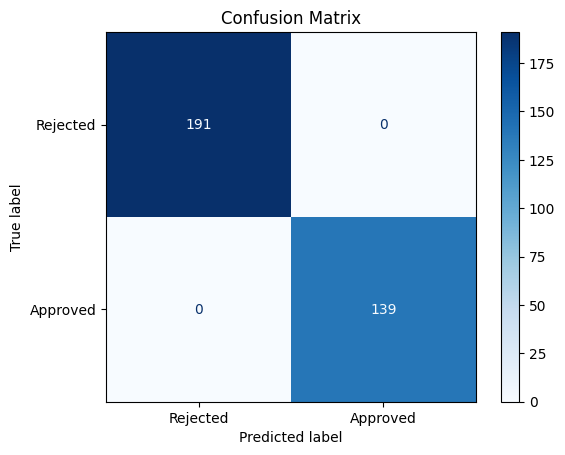

In [233]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Rejected", "Approved"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Test with New Client Data to see if request for credit is rejected or accepted

In [239]:
# 10. Test with New Client Data
new_client_data = {
    "A1": ["b"],       # Example categorical value
    "A2": [40],        # Age
    "A3": [3.5],       # Debt-to-income ratio
    "A4": ["u"],       # Married status
    "A5": ["g"],       # Gender
    "A6": ["cc"],      # Credit Card ownership
    "A7": ["v"],       # Employed
    "A8": [2.5],       # Years of Employment
    "A9": ["f"],       # Prior default
    "A10": [720],      # Credit Score
    "A11": ["t"],      # Drivers License
    "A12": ["t"],      # Citizen status
    "A14": [90000],    # Income
}
new_client_df = pd.DataFrame(new_client_data)
display (new_client_df)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14
0,b,40,3.5,u,g,cc,v,2.5,f,720,t,t,90000


In [241]:
# Preprocess new client data (One-hot encode)  This line performs one-hot encoding
# on the new client's data using the pd.get_dummies() function.
#One-hot encoding converts categorical features (like gender, education level, etc.)
#into numerical representations that the machine learning model can understand.
#drop_first=True is used to avoid redundancy in the encoded features
new_client_encoded = pd.get_dummies(new_client_df, drop_first=True)

display (new_client_encoded)

,A2,A3,A8,A10,A14
0,40,3.5,2.5,720,90000


In [244]:
new_client_encoded = new_client_encoded.reindex(columns=X_train.columns, fill_value=0)
#his line ensures that the columns in the encoded new client data match the columns used during model training (X_train.columns). This is important for consistency.
#If any columns are missing in the new client data, they are added with a fill value of 0
display (new_client_encoded)

,A2,A3,A8,A10,A14,A1_a,A1_b,A1_c,A1_d,A4_y,A5_p,A6_cc,A6_no_cc,A7_v,A9_t,A11_t,A12_f,A12_t,Class_1
0,40,3.5,2.5,720,90000,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
new_client_scaled = scaler.transform(new_client_encoded)
display (new_client_scaled)
# This line scales the numerical features in the new client data using the same scaler (scaler) that was used to scale the training data. Scaling ensures that the features have a similar range of values, which can improve the performance of some machine learning models

array([[0.43137255, 0.34717966, 0.50158969, 0.76642336, 0.53910191,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# Predict for new client
new_client_prediction = model.predict(new_client_scaled)
new_client_probability = model.predict_proba(new_client_scaled)
# This line uses the trained machine learning model (model)
# to predict whether the new client's loan application should be approved or rejected.
#The prediction is stored in new_client_prediction.

In [247]:


# Output the prediction
if new_client_prediction[0] == 1:
    print("New Client Prediction: Approved")
else:
    print("New Client Prediction: Rejected")

New Client Prediction: Rejected
